# Import Labraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [36]:
df = pd.read_csv("Snitch_Fashion_Sales_Uncleaned.csv")
print(df.head())

   Order_ID   Customer_Name Product_Category    Product_Name  Units_Sold  \
0      1000  Brian Thompson            Jeans  Slim Fit Jeans         NaN   
1      1001      Shaun Ross            Jeans  Slim Fit Jeans         1.0   
2      1002    Sarah Snyder          Jackets     Puffer Coat         1.0   
3      1003      Jay Briggs            Shoes         Loafers         2.0   
4      1004     Maria Blake      Accessories           Belts         1.0   

   Unit_Price  Discount_%  Sales_Amount  Order_Date       City Segment  \
0      842.00        0.60          0.00  2025-02-27      Delhi     B2C   
1         NaN         NaN          0.00  2025-07-15  Ahmedabad     NaN   
2      637.82         NaN          0.00  02-01-2025     Mumbai     B2B   
3     2962.27         NaN          0.00  18-06-2025  bengaluru     B2B   
4     2881.07        0.27       2103.18         NaN   hyderbad     NaN   

    Profit  
0  2137.45  
1  1588.15  
2  -158.03  
3  2296.50  
4    63.66  


# Data Inspection

In [37]:
print(df.size)
print(df.shape)



30000
(2500, 12)


In [38]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Customer_Name     2500 non-null   str    
 2   Product_Category  2500 non-null   str    
 3   Product_Name      2500 non-null   str    
 4   Units_Sold        1194 non-null   float64
 5   Unit_Price        1290 non-null   float64
 6   Discount_%        849 non-null    float64
 7   Sales_Amount      2500 non-null   float64
 8   Order_Date        1894 non-null   str    
 9   City              2500 non-null   str    
 10  Segment           1679 non-null   str    
 11  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), str(6)
memory usage: 234.5 KB
None


In [39]:
print(df.describe)

<bound method NDFrame.describe of       Order_ID      Customer_Name Product_Category       Product_Name  \
0         1000     Brian Thompson            Jeans     Slim Fit Jeans   
1         1001         Shaun Ross            Jeans     Slim Fit Jeans   
2         1002       Sarah Snyder          Jackets        Puffer Coat   
3         1003         Jay Briggs            Shoes            Loafers   
4         1004        Maria Blake      Accessories              Belts   
...        ...                ...              ...                ...   
2495      3495     Allen Williams         T-Shirts  Oversized T-shirt   
2496      3496      Jonathan Hill            Shoes            Loafers   
2497      3497  Alejandro Cochran          Jackets      Bomber Jacket   
2498      3498      Angela Adkins            Jeans       Straight Cut   
2499      3499     Zachary Werner         T-Shirts        Graphic Tee   

      Units_Sold  Unit_Price  Discount_%  Sales_Amount  Order_Date       City  \
0       

# Data Cleaning

In [40]:
print(df.isna().sum())
print(df.duplicated().sum())

Order_ID               0
Customer_Name          0
Product_Category       0
Product_Name           0
Units_Sold          1306
Unit_Price          1210
Discount_%          1651
Sales_Amount           0
Order_Date           606
City                   0
Segment              821
Profit                 0
dtype: int64
0


In [41]:
df.fillna(df.median(numeric_only=True),inplace=True)
print(df.isna().sum())

Order_ID              0
Customer_Name         0
Product_Category      0
Product_Name          0
Units_Sold            0
Unit_Price            0
Discount_%            0
Sales_Amount          0
Order_Date          606
City                  0
Segment             821
Profit                0
dtype: int64


In [42]:
from turtle import mode


df["Order_Date"]=pd.to_datetime(df["Order_Date"],errors="coerce")
df["Order_Date"]=df["Order_Date"].fillna(df["Order_Date"].mode()[0])
print(df.isna()["Order_Date"].sum())

0


In [43]:
df["Segment"]=df["Segment"].fillna(df["Segment"].mode()[0])
print(df.isna()["Segment"].sum())

0


# KPI Calculations

In [44]:
# Create Revenue Column
df["Revenue"]=df["Units_Sold"]*df["Unit_Price"]
print(df["Revenue"])
# Average Revenue
average_revenue=df["Revenue"].mean()
print("Average_revenue:",average_revenue)

0        1684.000
1        2685.985
2         637.820
3        5924.540
4        2881.070
          ...    
2495     1697.580
2496    10743.940
2497     6778.480
2498    19220.950
2499     7438.500
Name: Revenue, Length: 2500, dtype: float64
Average_revenue: 5282.004342


In [45]:
# Total Sale Amount
total_amount=df["Sales_Amount"].sum()
print("Total_Sale_Amount:",total_amount)
# Average Sale Amount
average_amount=df["Sales_Amount"].mean()
print("Average_Sale_Amount:",average_amount)

Total_Sale_Amount: 316890.63
Average_Sale_Amount: 126.756252


# Grouping data


In [46]:
df.replace({
    "hyd":"Hyderabad",
    "hyderbad":"Hyderabad"
}, inplace=True)
# Data grouping by region and calculating total sales
region_sales=df.groupby("City")["Sales_Amount"].sum()
print(region_sales)
print()
print("Most profitable region:",region_sales.idxmax())


City
Ahmedabad    56348.91
Bangalore    84312.15
Delhi        24145.83
Hyd          41301.77
Hyderabad    26999.20
Mumbai       40121.51
Pune         40714.24
bengaluru     2947.02
Name: Sales_Amount, dtype: float64

Most profitable region: Bangalore


In [47]:
# sales amount according to category and customer
category_sales=df.groupby(["Product_Category"])["Sales_Amount"].sum()
print(category_sales)
print()
top_customers=df.groupby("Customer_Name")["Sales_Amount"].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by sales amount:\n\n",top_customers)


Product_Category
Accessories    46838.93
Dresses        91044.93
Jackets        54656.69
Jeans          48072.38
Shoes          41782.84
T-Shirts       34494.86
Name: Sales_Amount, dtype: float64

Top 10 Customers by sales amount:

 Customer_Name
Joel Fitzpatrick     29180.68
Maria Morrow         25926.28
Christopher Stone    20013.83
Rodney Lee           19552.36
Tiffany Flores       17346.58
Samantha Gould       15585.16
Anita Ramirez        14397.34
Amanda Jones         13675.73
Rhonda Ray           13513.20
Dana Erickson        12815.47
Name: Sales_Amount, dtype: float64


In [48]:
# Sale amount according to date
date_sales=df.groupby("Order_Date")["Sales_Amount"].sum()
print(date_sales)


Order_Date
2023-07-23      0.00
2023-07-25      0.00
2023-07-26      0.00
2023-07-27      0.00
2023-07-28    180.93
               ...  
2025-07-12      0.00
2025-07-15      0.00
2025-07-20      0.00
2025-07-21      0.00
2025-07-22      0.00
Name: Sales_Amount, Length: 413, dtype: float64


# Loss Calculation

In [49]:
#Total Loss Amount
total_loss=abs(df[df["Profit"]<0]["Profit"].sum())
print("Total Loss Amount:",total_loss)

Total Loss Amount: 324307.08


# Growth Rate Calculations

In [50]:
df["Order_Date"]=pd.to_datetime(df["Order_Date"])
# Extracting month and year from order date
df["month"]=df["Order_Date"].dt.month
df["year"]=df["Order_Date"].dt.year
# Monthly Sales Analysis
monthly_sales=df.groupby("month")["Sales_Amount"].sum()
years_sales=df.groupby("year")["Sales_Amount"].sum()
total_month_sales=monthly_sales.sum()
total_year_sales=years_sales.sum()
print("="*40)
print("         Sales Summary Report")
print("="*40)
print("\nMonthly Sale:\n",monthly_sales)
print("\nTotal month sale:",total_month_sales)
print("\nYearly Sale:\n",years_sales)
print("\nTotal Year Sale:",total_year_sales)

         Sales Summary Report

Monthly Sale:
 month
1      12651.14
2      -2715.05
3     242689.36
4       9629.60
5       1834.17
6      11637.35
7       1052.10
8      27270.58
9       2020.64
10     -1091.63
11      3132.74
12      8779.63
Name: Sales_Amount, dtype: float64

Total month sale: 316890.63

Yearly Sale:
 year
2023     25731.82
2024    244800.36
2025     46358.45
Name: Sales_Amount, dtype: float64

Total Year Sale: 316890.63


In [51]:
sales_2023=df[df["year"]==2023]
monthly_sales_2023=sales_2023.groupby("month")["Sales_Amount"].sum()
print("Monthly Sales in 2023:\n\n",monthly_sales_2023)

Monthly Sales in 2023:

 month
7       415.81
8     21662.35
9      -975.67
10    -4150.30
11        0.00
12     8779.63
Name: Sales_Amount, dtype: float64


In [52]:
sales_2024=df[df["year"]==2024]
monthly_sales_2024=sales_2024.groupby("month")["Sales_Amount"].sum()
print("Monthly Sales in 2024:\n\n",monthly_sales_2024)

Monthly Sales in 2024:

 month
1       1550.05
2      -4943.11
3     233763.79
4       2475.73
5      -1439.96
6      -2038.38
7        636.29
8       5608.23
9       2996.31
10      3058.67
11      3132.74
12         0.00
Name: Sales_Amount, dtype: float64


In [53]:
sales_2025=df[df["year"]==2025]
monthly_sales_2025=sales_2025.groupby("month")["Sales_Amount"].sum()
print("Monthly Sales in 2025:\n\n",monthly_sales_2025)

Monthly Sales in 2025:

 month
1    11101.09
2     2228.06
3     8925.57
4     7153.87
5     3274.13
6    13675.73
7        0.00
Name: Sales_Amount, dtype: float64


In [54]:
# Top 10 products and lowest products by sales amount
top_products=df.groupby("Product_Category")["Sales_Amount"].sum().sort_values(ascending=False)
print("Top 10 Products by sales amount:\n\n",top_products)
lowest_products=df.groupby("Product_Category")["Sales_Amount"].sum().sort_values(ascending=True).head(2)
print("\nLowest 10 Products by sales amount:\n\n",lowest_products)

Top 10 Products by sales amount:

 Product_Category
Dresses        91044.93
Jackets        54656.69
Jeans          48072.38
Accessories    46838.93
Shoes          41782.84
T-Shirts       34494.86
Name: Sales_Amount, dtype: float64

Lowest 10 Products by sales amount:

 Product_Category
T-Shirts    34494.86
Shoes       41782.84
Name: Sales_Amount, dtype: float64


# Correlations

In [59]:
#Discount and Profit correlation
correlation=df["Discount_%"].corr(df["Profit"])
print("Correlation between Discount and Profit:", correlation)
print()
print("The correlation between discount and profit is 0.0396.\nThis indicates a very weak positive correlation,\n" \
"This suggests that discount have minimal impact on proftability.")

Correlation between Discount and Profit: 0.039607030418600295

The correlation between discount and profit is 0.0396.
This indicates a very weak positive correlation,
This suggests that discount have minimal impact on proftability.


# Visualizations

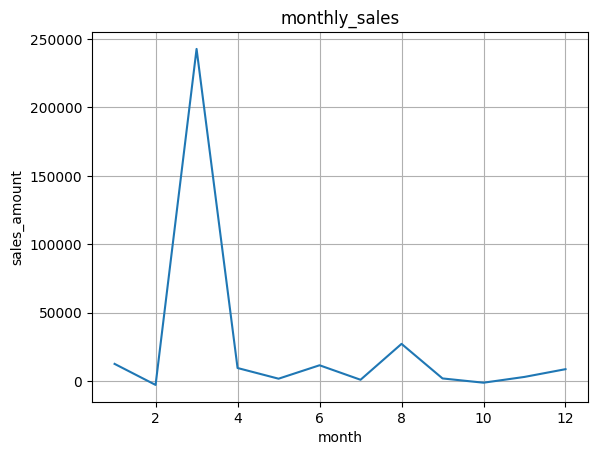

In [68]:
#plotting sales amount by monthly sales
from matplotlib.pyplot import plot
monthly_sales.plot(kind="line")
plt.title("monthly_sales")
plt.xlabel("month")
plt.ylabel("sales_amount")
plt.grid(True)
plt.show()
                   


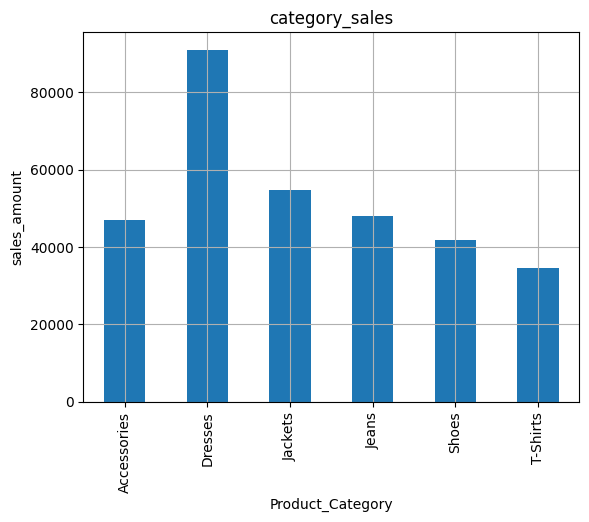

In [67]:
#plotting sales amount by category sales
from matplotlib.pyplot import plot
category_sales.plot(kind="bar")
plt.title("category_sales")
plt.xlabel("Product_Category")
plt.ylabel("sales_amount")
plt.grid(True)
plt.show()
                   


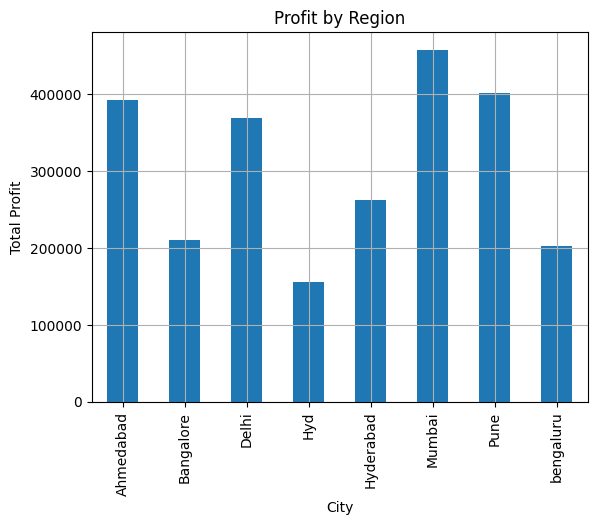

In [69]:
#plotting sales amount by profit by region
from matplotlib.pyplot import plot
profit_by_region=df.groupby("City")["Profit"].sum()
profit_by_region.plot(kind="bar")
plt.title("Profit by Region")
plt.xlabel("City")
plt.ylabel("Total Profit")
plt.grid(True)
plt.show()
                   


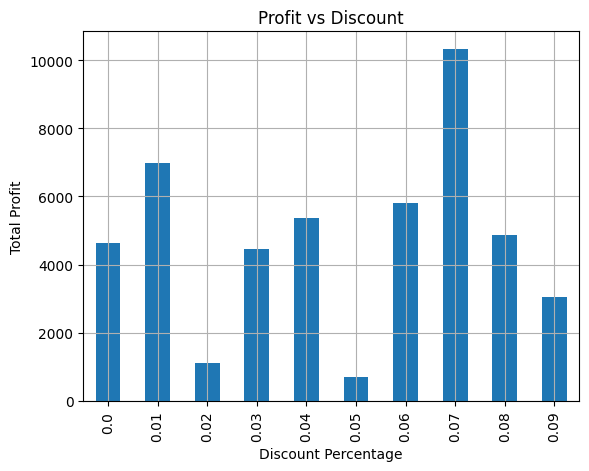

In [74]:
#plotting sales amount by discount vs profit
from matplotlib.pyplot import plot
discount_vs_profit=df.groupby("Discount_%")["Profit"].sum().head(10)
discount_vs_profit.plot(kind="bar")
plt.title("Profit vs Discount")
plt.xlabel("Discount Percentage")
plt.ylabel("Total Profit")
plt.grid(True)
plt.show()
                   


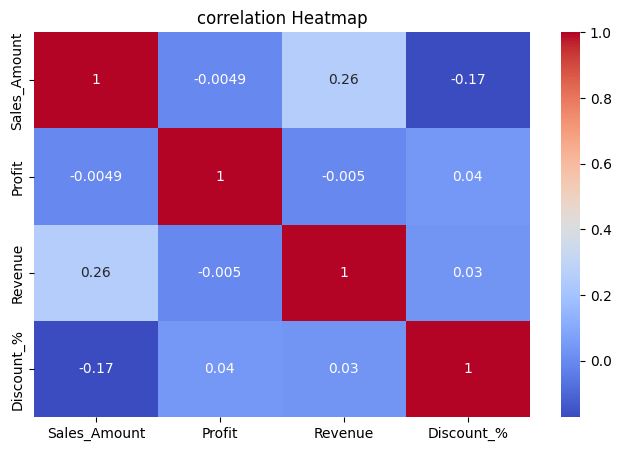

In [77]:
# Correlatiom heatmap
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(df[["Sales_Amount","Profit","Revenue","Discount_%"]].corr(), annot=True, cmap="coolwarm")
plt.title("correlation Heatmap")
plt.show()

# Business Insights



Business Insights:

1. Sales_Amount and Revenue show a strong positive correlation, indicating that as sales increase, revenue also rises proportionally. This suggests effective pricing and sales strategies are in place

2. Profit is moderately correlated with Sales_Amount and Revenue, implying that higher sales generally lead to higher profits, but other factors such as discounts and costs also play a significant role

3. Discount_% has a very weak positive correlation with Profit, suggesting that offering discounts does not significantly impact overall profitability. This may indicate that discounts are not deep enough to erode margins or are strategically applied

4. The weak correlation between Discount_% and Sales_Amount suggests that increasing discounts does not necessarily drive higher sales volumes. This could mean customers are not highly price-sensitive or that discounts are not a primary purchase driver.

5. The overall low correlations involving Discount_% highlight an opportunity to re-evaluate discount strategies. The business may benefit from targeted promotions or alternative incentives to boost both sales and profit.

# Strategic Recommendations

Strategic Recommendations:

1. Focus on High-Performing Categories: Dresses and Jackets are the top-performing product categories by sales amount. Increase inventory, marketing, and promotional efforts for these categories to maximize revenue.

2. Address Underperforming Categories: T-Shirts and Shoes have the lowest sales. Investigate reasons (e.g., pricing, design, marketing) and consider targeted promotions or product improvements.

3. Optimize Regional Strategies: Mumbai and Ahmedabad are leading in both sales and profit. Expand successful strategies from these regions to others, and address underperformance in cities like 'bengaluru' and 'Hyd'

4. Review Discount Policies: The correlation between discount percentage and profit is very weak (0.04). Re-evaluate discount strategies to ensure they are driving desired outcomes without eroding margins.

5. Customer Segmentation: Leverage data on top customers for loyalty programs and personalized marketing to increase repeat purchases and customer lifetime value."

6. Loss Reduction: The total loss amount is significant. Analyze loss-making transactions to identify root causes (e.g., excessive discounts, high costs) and implement corrective actions.

7. Monitor Monthly Trends: Sales are highly seasonal, with peaks in March and troughs in some months. Plan inventory and marketing campaigns around these trends to optimize cash flow and stock levels.





In [91]:
df.to_csv("Snitch_Fashion_Sales_Cleaned.csv", index=False)